script to plot diurnal cycle of wvmr and Hwind


In [1]:
# importing necessary libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import numpy as np
import xarray as xr
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import glob
import matplotlib.ticker as ticker
import pandas as pd


path_files= '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/post_processed_data/diurnal_cycle/'

filenames = ['H_wind_diurnal_cycle.nc', 'MR_diurnal_cycle.nc']
H_wind_data = xr.open_dataset(path_files+filenames[0])
MR_data = xr.open_dataset(path_files+filenames[1])
print(H_wind_data)
print(MR_data)

<xarray.Dataset>
Dimensions:  (height: 400, time: 96)
Coordinates:
  * time     (time) datetime64[ns] 2022-03-04 ... 2022-03-04T23:45:00
  * height   (height) float64 0.0 21.21 42.42 ... 8.42e+03 8.442e+03 8.463e+03
Data variables:
    H_speed  (time, height) float64 ...
    H_dir    (time, height) float64 ...
Attributes:
    CREATED_BY:          Claudia Acquistapace
    CREATED_ON:          2022-03-04 11:04:51.678557
    FILL_VALUE:          NaN
    AUTHOR_NAME:         Claudia Acquistapace
    AUTHOR_AFFILIATION:  University of Cologne (UNI), Germany
    AUTHOR_ADDRESS:      Institute for geophysics and meteorology, Pohligstra...
    AUTHOR_MAIL:         cacquist@meteo.uni-koeln.de
    DATA_DESCRIPTION:    diurnal cycle of the variable horizontal wind speed ...
    DATA_DISCIPLINE:     Atmospheric Physics - Remote Sensing Lidar Profiler
    DATA_GROUP:          Experimental;Profile;Moving
    DATA_SOURCE:         Doppler lidar data
    DATA_PROCESSING:     https://github.com/ClauClou

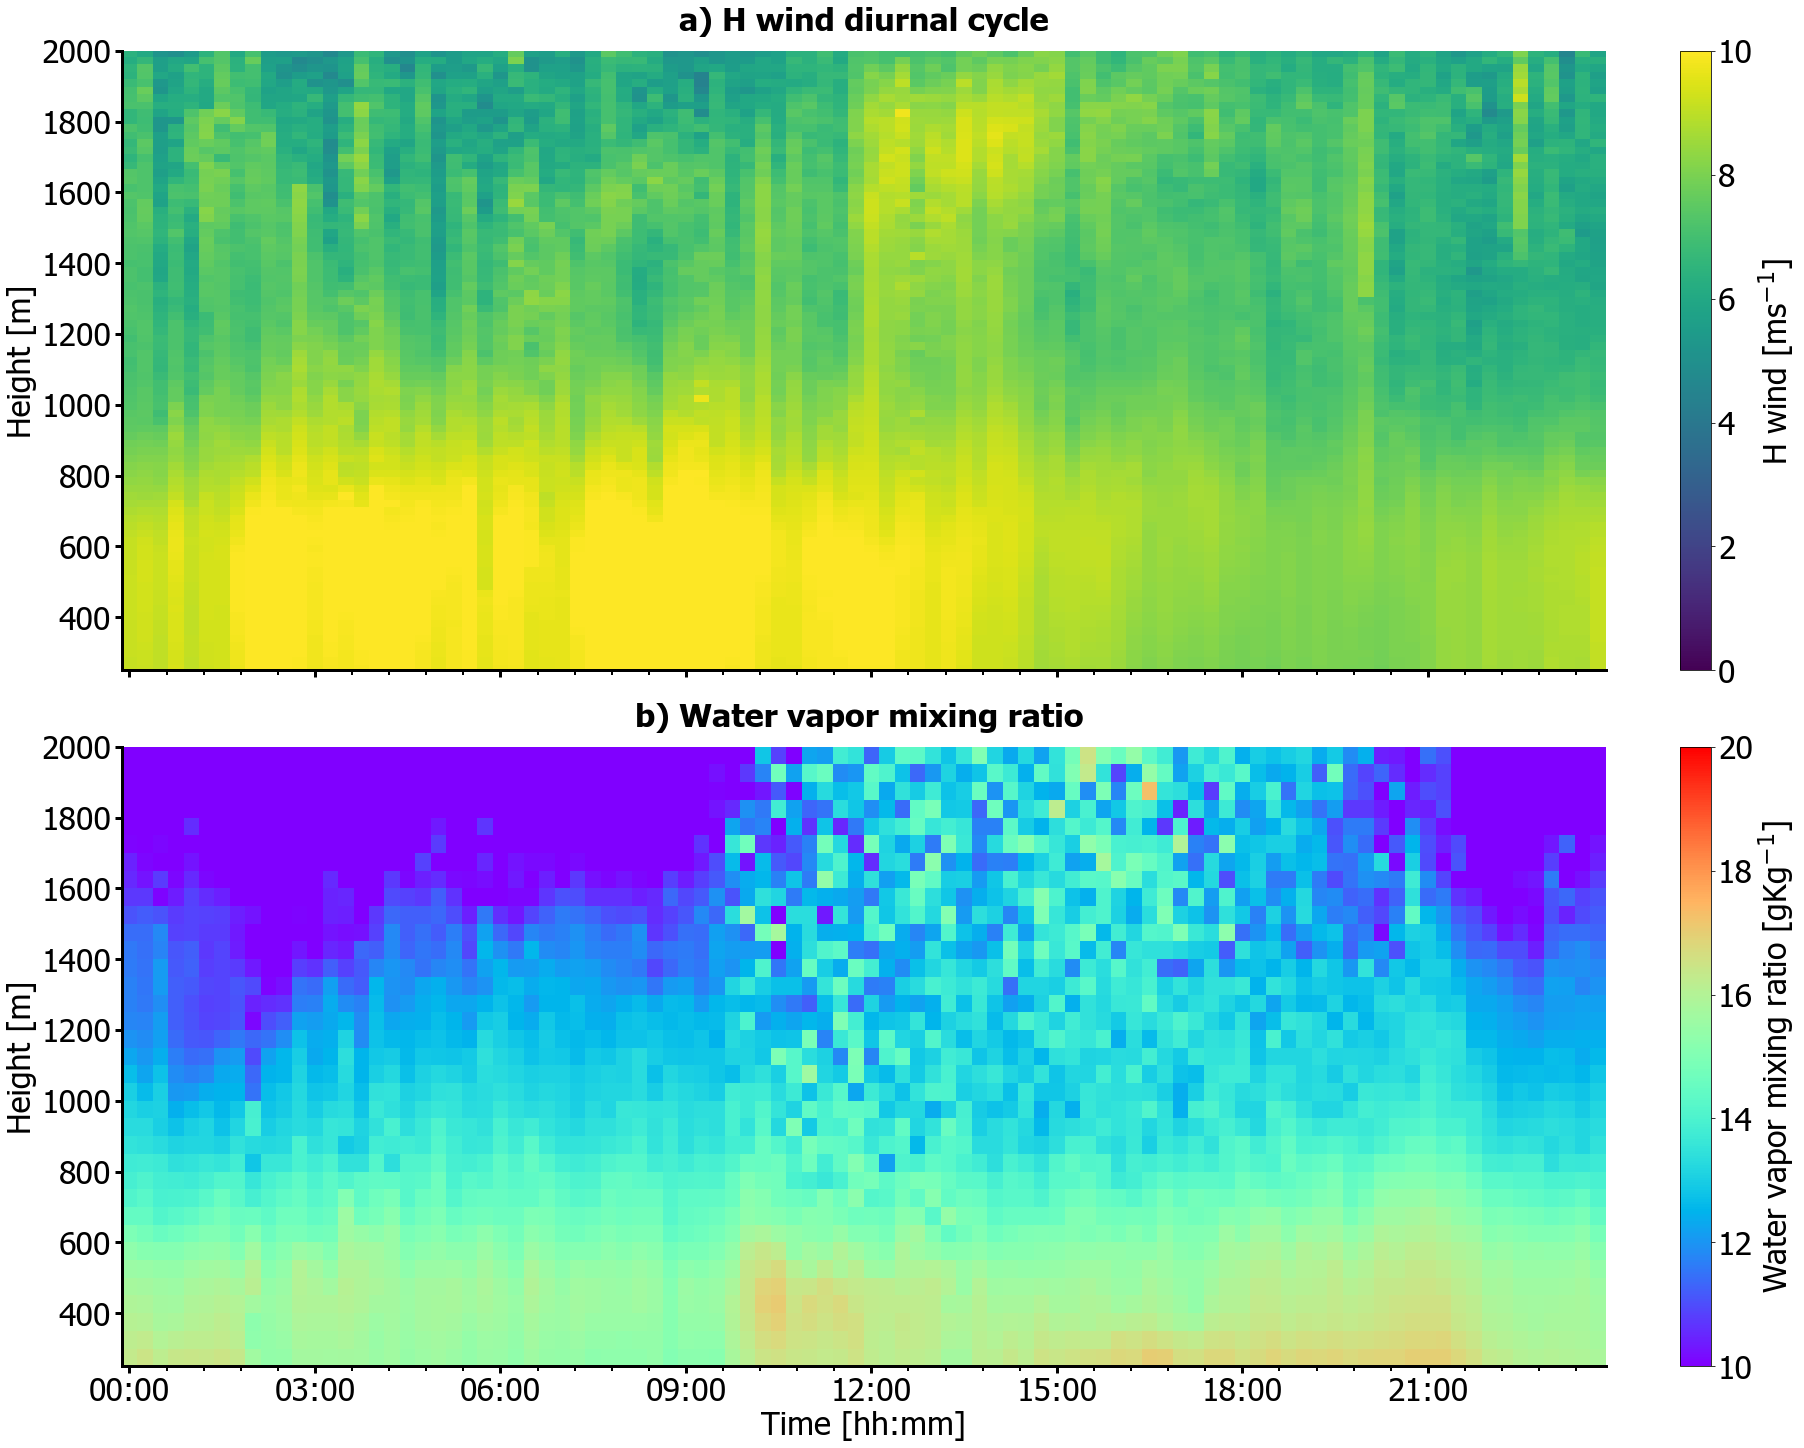

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.font_manager as font_manager
import matplotlib.dates as mdates

rcParams['axes.titlepad'] = 20 
#gs = gridspec.GridSpec(3, 3)

# calculate label marks for bins
#sst_bin_label = []
#for ind in range(len(binned_sst_rs)-1):
#    sst_bin_label.append(round((binned_sst_rs[ind]+binned_sst_rs[ind+1])/2,2))
    

font = font_manager.FontProperties(family='Tahoma',
                                   weight='light',
                                   style='normal', size=12)


# composite figure variables binned in sst 
path_out_plots = '/Volumes/Extreme SSD/work/006_projects/001_Prec_Trade_Cycle/SST_impact_work/plots_paper/'



dict_plot_settings = {
    'labelsizeaxes':32,
    'fontSizeTitle':32,
    'fontSizeX'    :32,
    'fontSizeY'    :32,
    'cbarAspect'   :15,
    'fontSizeCbar' :32,
    'rcparams_font':['Tahoma'],
    'savefig_dpi'  :100,
    'font_size'    :32, 
    'grid'         :True}


# plots settings defined by user at the top
labelsizeaxes   = dict_plot_settings['labelsizeaxes']
fontSizeTitle   = dict_plot_settings['fontSizeTitle']
fontSizeX       = dict_plot_settings['fontSizeX']
fontSizeY       = dict_plot_settings['fontSizeY']
cbarAspect      = dict_plot_settings['cbarAspect']
fontSizeCbar    = dict_plot_settings['fontSizeCbar']
rcParams['font.sans-serif'] = dict_plot_settings['rcparams_font']
matplotlib.rcParams['savefig.dpi'] = dict_plot_settings['savefig_dpi']
plt.rcParams.update({'font.size':dict_plot_settings['font_size']})
grid = dict_plot_settings['grid']



fig, axs = plt.subplots(2, 1, figsize=(25,20), sharex=True, constrained_layout=True)# 


#ax = fig.add_subplot(gs[0, 0])

mesh2 = axs[0].pcolormesh(H_wind_data.time.values, H_wind_data.height.values, H_wind_data.H_speed.values.T, cmap='viridis', vmin=0., vmax=10.)
cbar = fig.colorbar(mesh2, ax=axs[0])
cbar.set_label(label='H wind [ms$^{-1}$]',  size=fontSizeX)

axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)
axs[0].spines["bottom"].set_linewidth(3)
axs[0].spines["left"].set_linewidth(3)
axs[0].set_title('a) H wind diurnal cycle', fontsize=32, fontweight='black')

axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs[0].tick_params(which='minor', length=5, width=2)
axs[0].tick_params(which='major', length=7, width=3)
axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs[0].tick_params(axis='both', labelsize=32)
axs[0].set_ylim(250.,2000.)    


mesh1 = axs[1].pcolormesh(MR_data.Time.values, MR_data.Height.values, MR_data.diurnal_cycle.values.T, cmap='rainbow', vmin=10., vmax=20.)
cbar = fig.colorbar(mesh1, ax=axs[1])
cbar.set_label(label='Water vapor mixing ratio [gKg$^{-1}$]',  size=fontSizeX)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)
axs[1].spines["bottom"].set_linewidth(3)
axs[1].spines["left"].set_linewidth(3)
axs[1].set_title('b) Water vapor mixing ratio ', fontsize=32, fontweight='black')

axs[1].xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs[1].tick_params(which='minor', length=5, width=2)
axs[1].tick_params(which='major', length=7, width=3)
axs[1].xaxis.set_minor_locator(ticker.AutoMinorLocator(n=5))
axs[1].tick_params(axis='both', labelsize=32)
axs[1].set_ylim(250.,2000.)    
axs[1].set_xlabel('Time [hh:mm]')

for ax in axs:
    ax.set_ylabel('Height [m]')
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

fig.savefig(path_out_plots+'diurnal_cycles_Hwind_MR_R1.png', format='png')